In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything

In [3]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [4]:
pipe.load_lora_weights(
    "Yuanshi/OminiControl",
    weight_name=f"experimental/fill.safetensors",
    adapter_name="fill",
)

  0%|          | 0/28 [00:00<?, ?it/s]

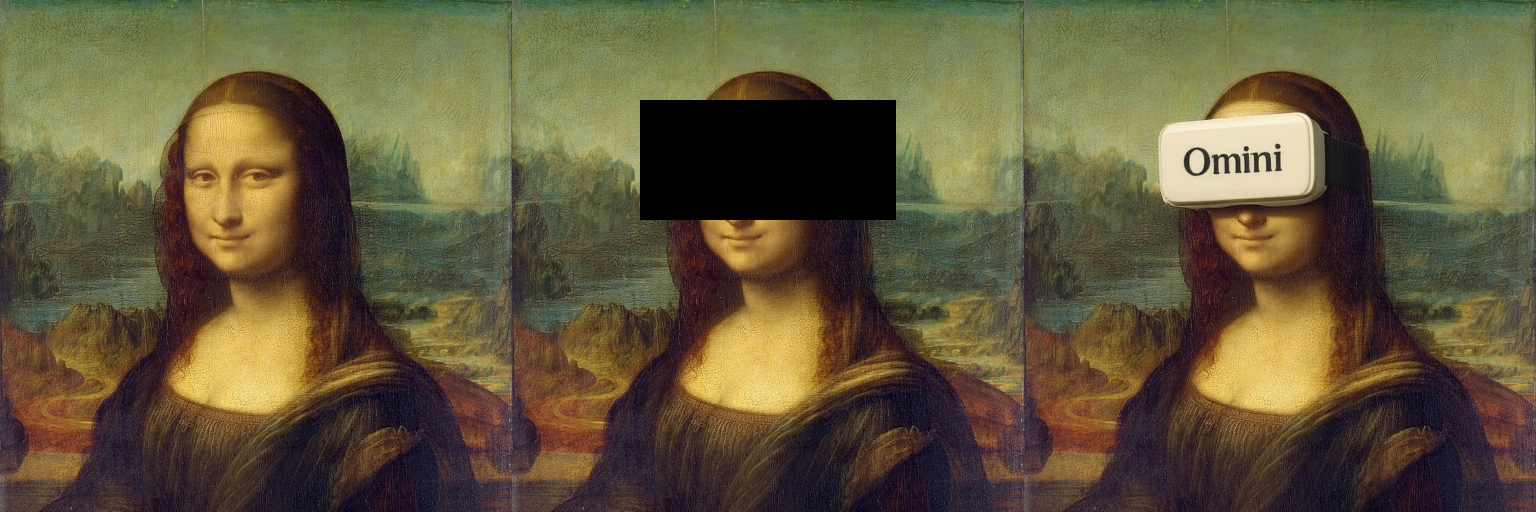

In [5]:
image = Image.open("assets/monalisa.jpg").convert("RGB").resize((512, 512))

masked_image = image.copy()
masked_image.paste((0, 0, 0), (128, 100, 384, 220))

condition = Condition("fill", masked_image)

seed_everything()
result_img = generate(
    pipe,
    prompt="The Mona Lisa is wearing a white VR headset with 'Omini' written on it.",
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

  0%|          | 0/28 [00:00<?, ?it/s]

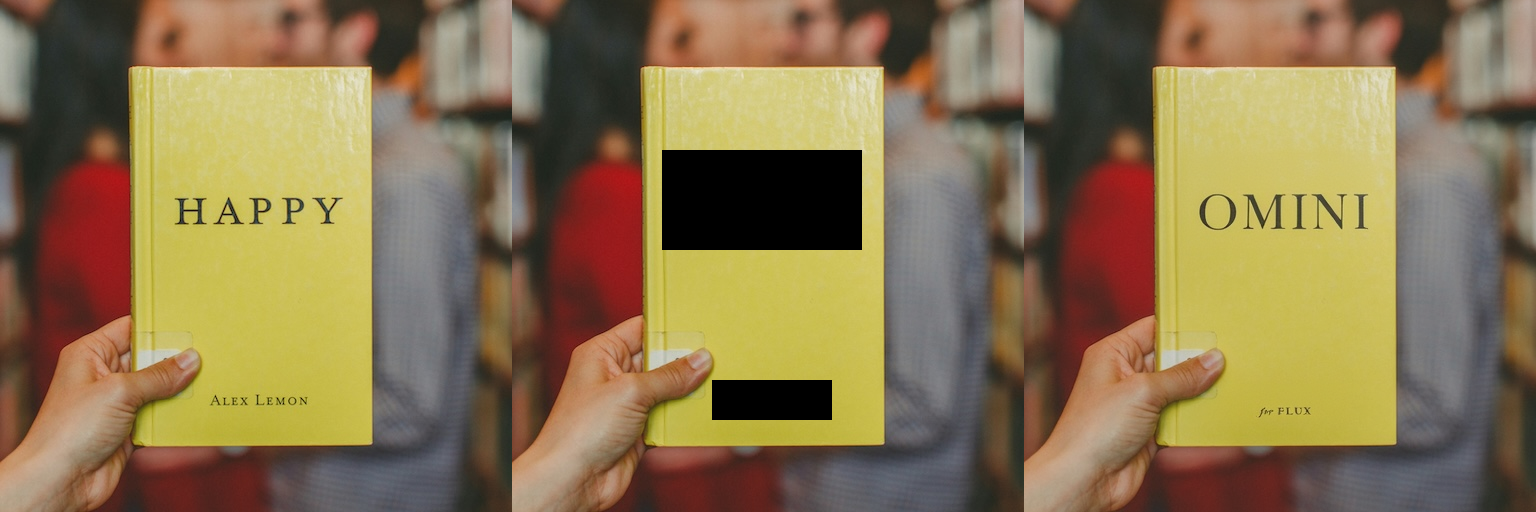

In [6]:
image = Image.open("assets/book.jpg").convert("RGB").resize((512, 512))

w, h, min_dim = image.size + (min(image.size),)
image = image.crop(
    ((w - min_dim) // 2, (h - min_dim) // 2, (w + min_dim) // 2, (h + min_dim) // 2)
).resize((512, 512))


masked_image = image.copy()
masked_image.paste((0, 0, 0), (150, 150, 350, 250))
masked_image.paste((0, 0, 0), (200, 380, 320, 420))

condition = Condition("fill", masked_image)

seed_everything()
result_img = generate(
    pipe,
    prompt="A yellow book with the word 'OMINI' in large font on the cover. The text 'for FLUX' appears at the bottom.",
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image